<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [15]:
print(boston_df.head)

<bound method NDFrame.head of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TA

{'whiskers': [<matplotlib.lines.Line2D at 0xb41d970>,
 'caps': [<matplotlib.lines.Line2D at 0xb415278>,
 'boxes': [<matplotlib.lines.Line2D at 0xb40ea50>],
 'medians': [<matplotlib.lines.Line2D at 0xb4129f0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3f8568>],
 'means': []}

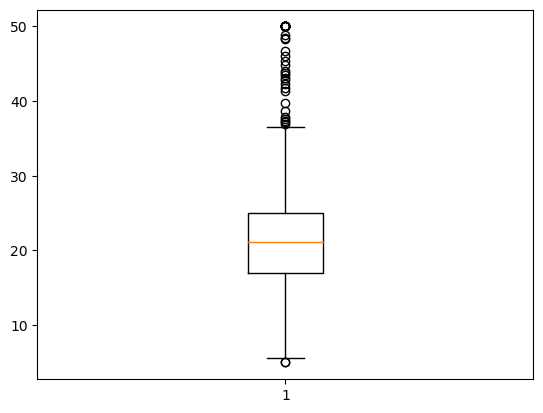

In [16]:
#Create a boxplot for the media value of Eigenheim.

pyplot.boxplot(boston_df['MEDV'])



**Note: Outliers after the third quartile**



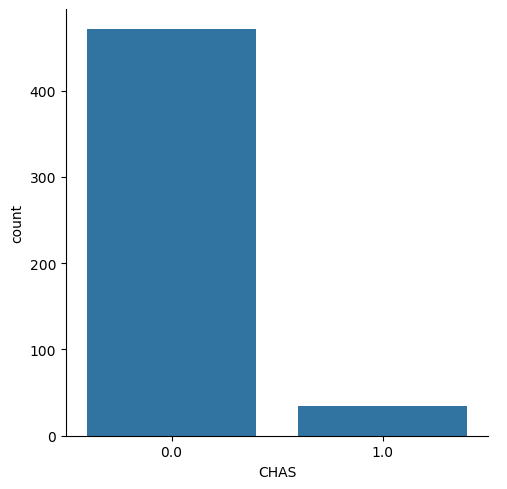

In [17]:
#Create a bar diagram for the variable Charles River.
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.show()



**Note: The majority of the areas do not border the Charles River**



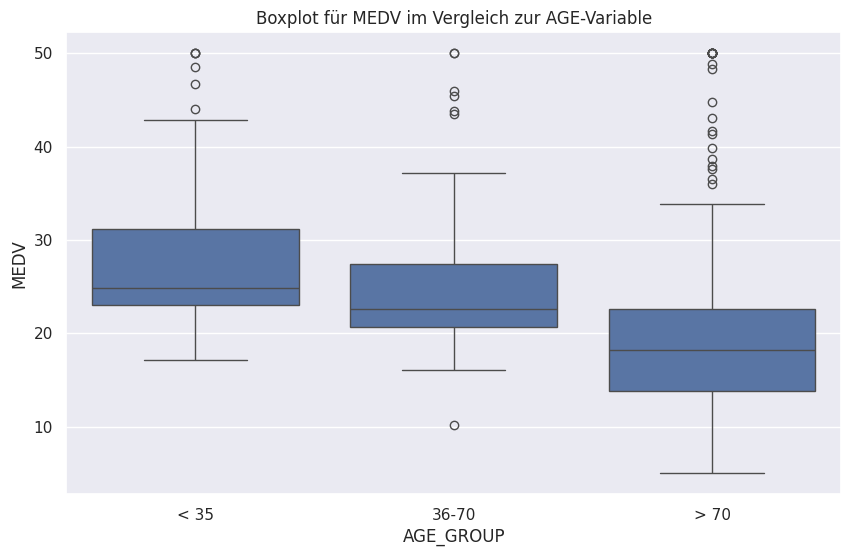

In [18]:
#Create a boxplot for the MEDV variable compared to the AGE variable.

bins = [0, 35, 70, float('inf')]
labels = ['< 35', '36-70', '> 70']
df = boston_df
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Erstelle den Boxplot
sns.set()
pyplot.figure(figsize=(10,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
pyplot.title('Boxplot für MEDV im Vergleich zur AGE-Variable')
pyplot.show()



**Note: The younger age group pays the highest median price for houses, while the over 70s move into cheaper homes**




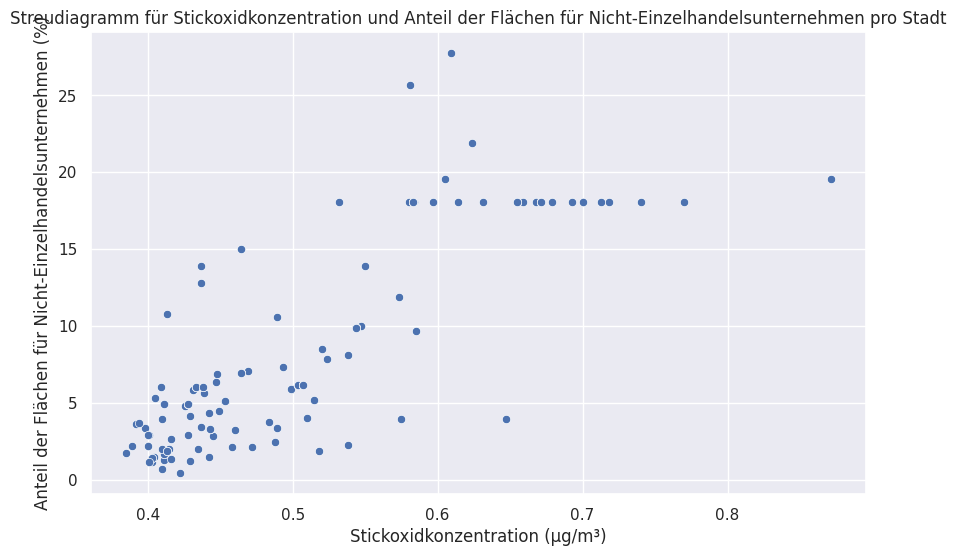

In [19]:
#Create a scatter diagram that shows the relationship between the nitric oxide concentration and the amount of areas for non-sector businesses per city.
df = boston_df

sns.set()
pyplot.figure(figsize=(10,6))
sns.scatterplot(x='NOX', y='INDUS', data=df)
pyplot.title('Streudiagramm für Stickoxidkonzentration und Anteil der Flächen für Nicht-Einzelhandelsunternehmen pro Stadt')
pyplot.xlabel('Stickoxidkonzentration (μg/m³)')
pyplot.ylabel('Anteil der Flächen für Nicht-Einzelhandelsunternehmen (%)')
pyplot.show()



**Note: There appears to be a linear relationship up to NOX=0.6.**




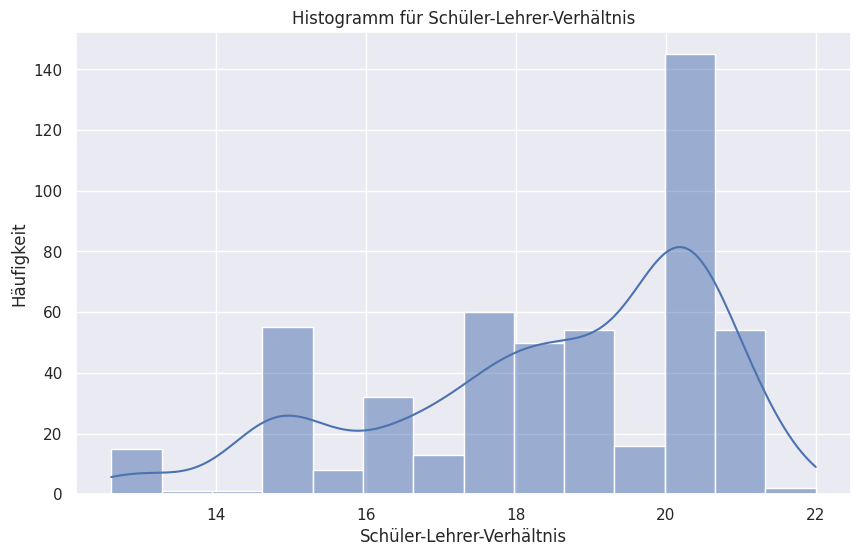

In [20]:
#Create a histogram for the variable Schüler-Lehrer-Verhältnis.
df = boston_df

sns.set()
pyplot.figure(figsize=(10,6))
sns.histplot(data=df['PTRATIO'], kde=True)
pyplot.title('Histogramm für Schüler-Lehrer-Verhältnis')
pyplot.xlabel('Schüler-Lehrer-Verhältnis')
pyplot.ylabel('Häufigkeit')
pyplot.show()



**Note: The pupil/teacher ratio is the highest at 21.**




# 2.1.
Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)




**Hypothesis:**

H₀: No significant difference in MEDV between CHAS

H₁: Significant difference in MEDV



In [21]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)


**Since the p-value is less than 0.05 we can assume these variance are not equal.**


In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


**Conclusion:**

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river and otherwise.


# 2.2
Is there a difference in median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)



**Hypothesis:**

H₀: No significant difference in MEDV across AGE groups

H₁: Significant difference in MEDV across AGE groups




H0:µ1=µ2  ("The three proportion medians are equal")

H1:µ1≠µ2  ("At least one of the median differ")

α = 0.05


In [ ]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35years_lower']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between_35_70years']
seventy_upper = boston_df[boston_df['AGE_GROUP'] == '70years_upper']

scipy.stats.f_oneway(thirtyfive_lower['MEDV'], thirtyfive_seventy['MEDV'], seventy_upper['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


**Conclusion:**

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that at least one of the median differ.


# 2.3
Is there a relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)? (Pearson Correlation)


**Hypothesis:**

H₀: No relationship between NOX and INDUS

H₁: Significant relationship between NOX and INDUS


In [ ]:
# Pearson Correlation
correlation, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Display the results
correlation, p_value_corr

Impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes (Regression Analysis)


**Hypothesis:**

H₀: No significant impact of DIS (distance to employment centers) on MEDV

H₁: Significant impact of DIS (distance to employment centers) on MEDV


<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

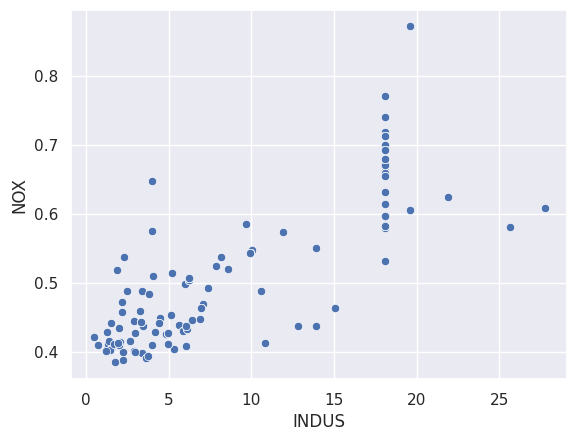

In [27]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

In [28]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


**Conclusion:**
Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that There is a relationship between Nitric oxide concentrations and proportion of non-retial business acres per town.


# 2.4. 
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?


H0: ("There is no significant linear relationship between distance to the five Boston employment centres and the median value of owner occupied homes")

H1 : ("There is a significant linear relationship between distance to the five Boston employment centres and the median value of owner occupied homes")

α = 0.05


In [30]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        17:11:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



**Conclusion:**

Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that There is a significant linear relationship between distance to the five Boston employment centres and the median value of owner occupied homes.


R-squared is 0.062 so correlation coefficient is 0.25 (square root of 0.062).